# Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('wa_fn-usec_-telco-customer-churn.csv')

# Get the number of rows and columns
rows, columns = df.shape

rows, columns


(7043, 21)

# Loading the Dataset and Initial Exploration

In [5]:
# Load the Telco Customer Churn dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [6]:
# Display first few records to understand the structure
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Data Cleaning and Preprocessing

In [7]:
# Get information about the dataset such as columns, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Statistical summary of numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
# Check for missing values across columns
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
# Check for duplicated values across columns
df.duplicated().sum()

np.int64(0)

In [11]:
# Drop the 'customerID' column as it's not relevant for prediction
data = df.drop('customerID', axis=1)

In [12]:
data['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [13]:
# Handling 'No phone service' as 'No' in 'MultipleLines' column
data['MultipleLines'] = data['MultipleLines'].replace('No phone service', 'No')

In [14]:
# Identify rows with empty 'TotalCharges' values
data[data['TotalCharges'].str.strip() == '']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
# Replace empty values with 0 in 'TotalCharges'
data['TotalCharges'] = data['TotalCharges'].replace(' ', 0)

In [16]:
# Convert 'TotalCharges' to float and replace zeros with the column mean
data['TotalCharges'] = data['TotalCharges'].astype(float)
data['TotalCharges'] = data['TotalCharges'].replace(0, data['TotalCharges'].mean())

In [17]:
# Encoding categorical variables using LabelEncoder
label_encoder = LabelEncoder()
columns_to_encode = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                     'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                     'PaperlessBilling', 'PaymentMethod', 'Churn']
data[columns_to_encode] = data[columns_to_encode].apply(lambda col: label_encoder.fit_transform(col))

In [18]:
# Checking the updated dataset information after encoding
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


# Data Visualization

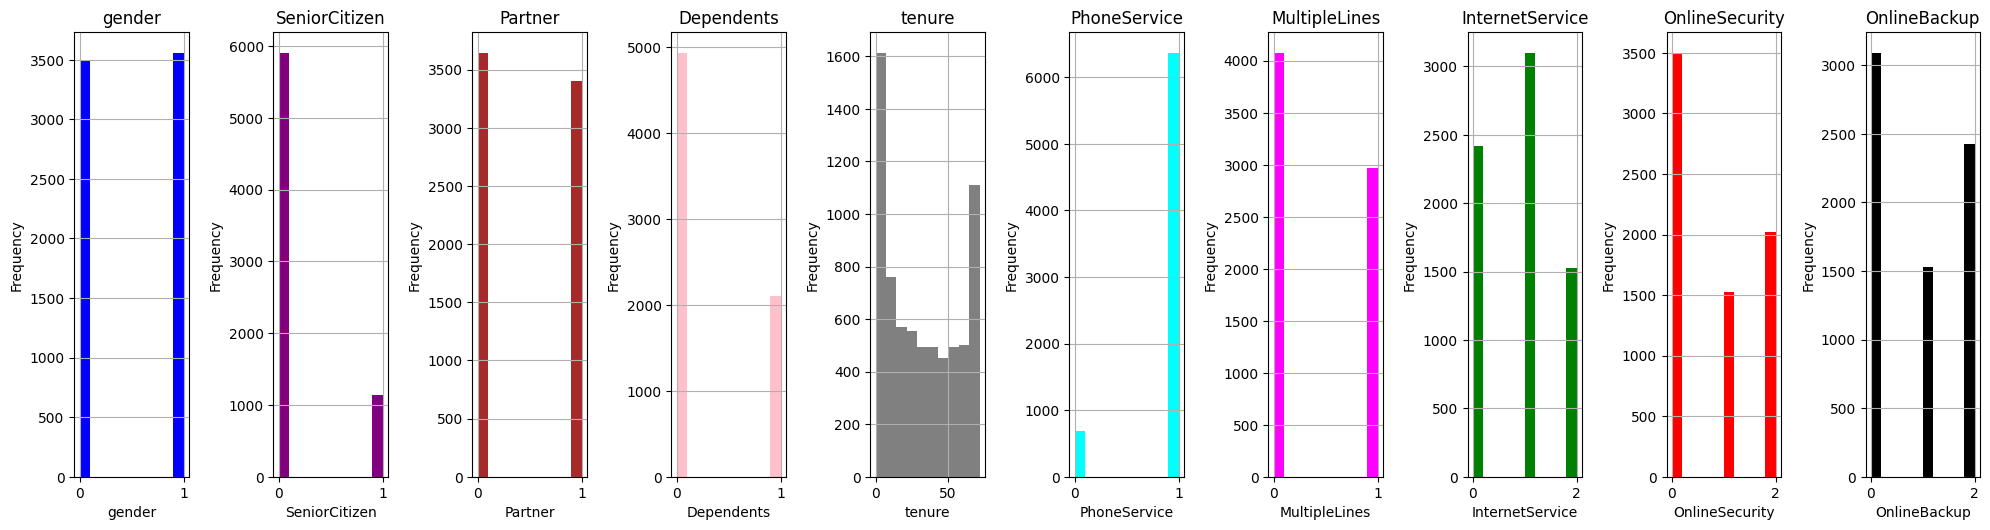

In [19]:
# Visualizing the distribution of numerical columns (first set)
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns[0:10]
plt.figure(figsize=(20, 10))
colors = ['blue', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'green', 'red', 'black']
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 10, i)
    data[col].hist(color=colors[i-1])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

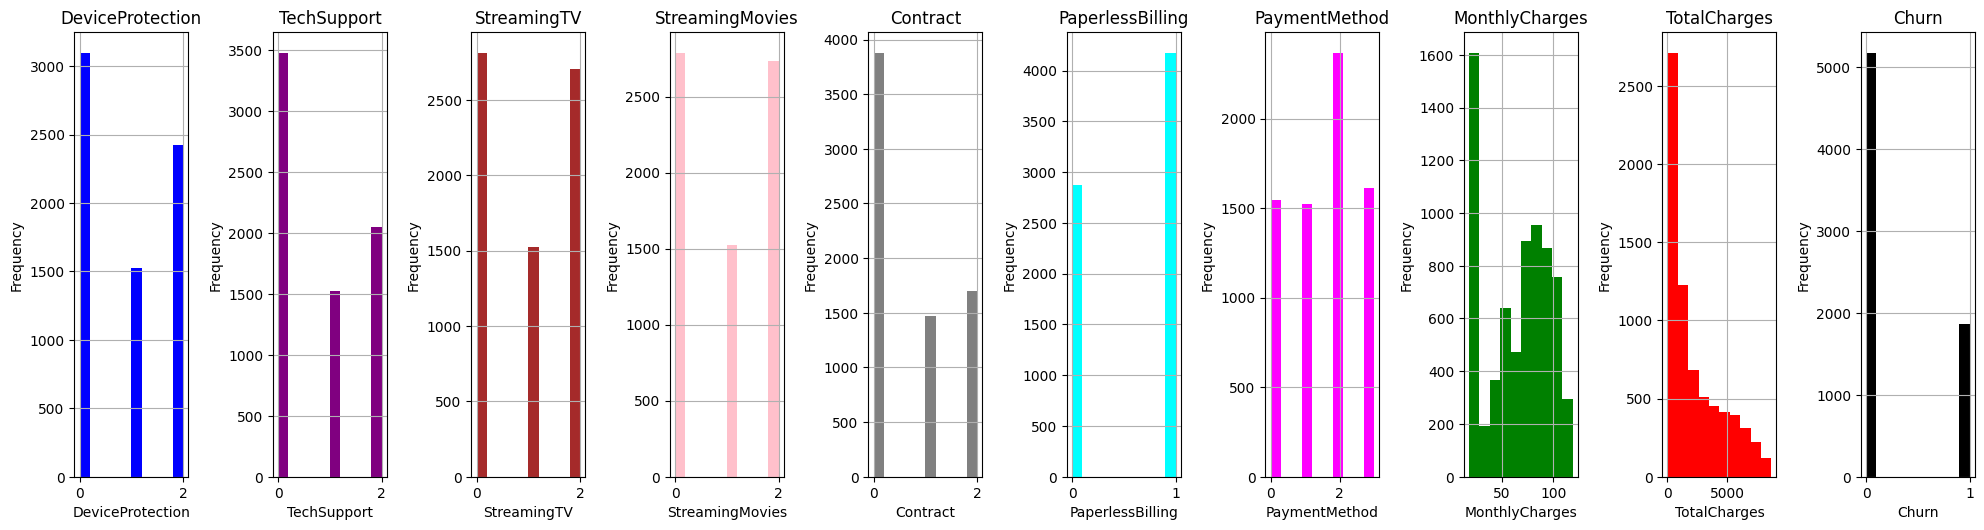

In [20]:
# Visualizing the distribution of numerical columns (second set)
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns[10:]
plt.figure(figsize=(20, 10))
colors = ['blue', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'green', 'red', 'black']
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 10, i)
    data[col].hist(color=colors[i-1])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

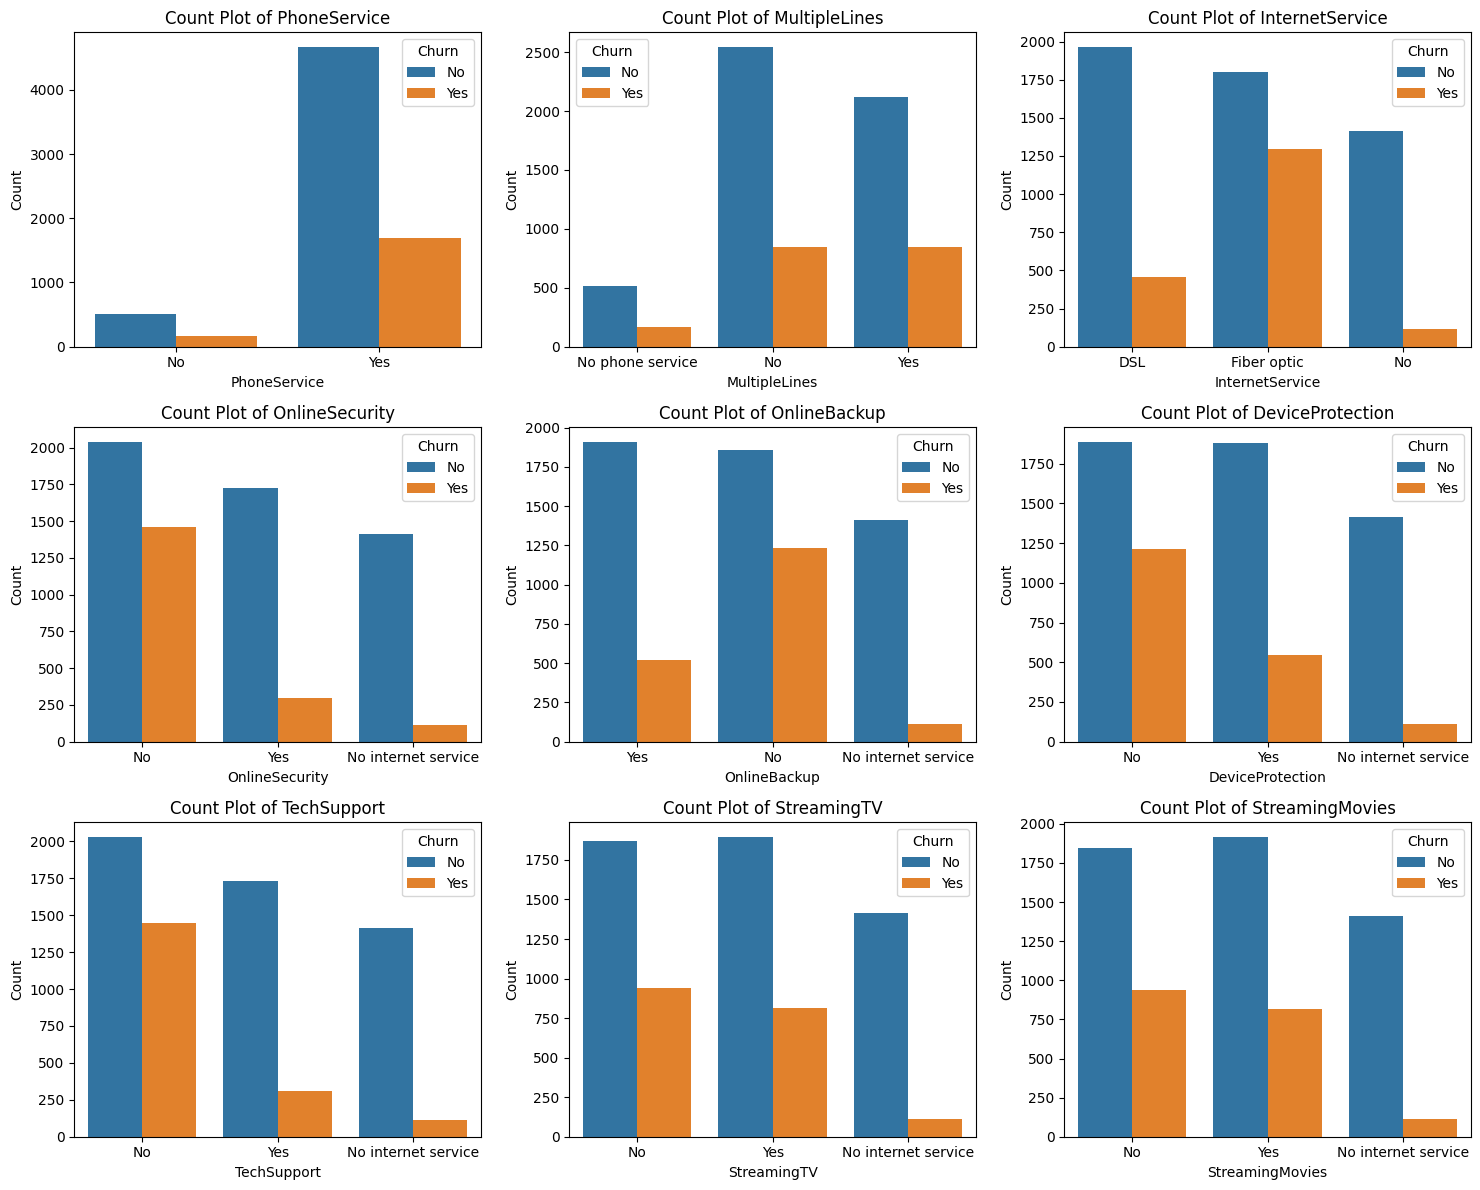

In [21]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Pie chart of churn labels')

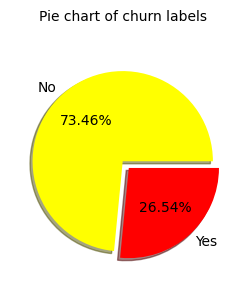

In [22]:
plt.subplot(1,2,2)
churn_label_count = df["Churn"].value_counts()
plt.pie(
    churn_label_count,
    autopct="%.2f%%",
    labels=churn_label_count.index,
    colors=["Yellow", "red"],
    explode=[0, 0.1],
    shadow=True,
)
plt.title("Pie chart of churn labels", pad=20, fontsize=10, fontweight=20)

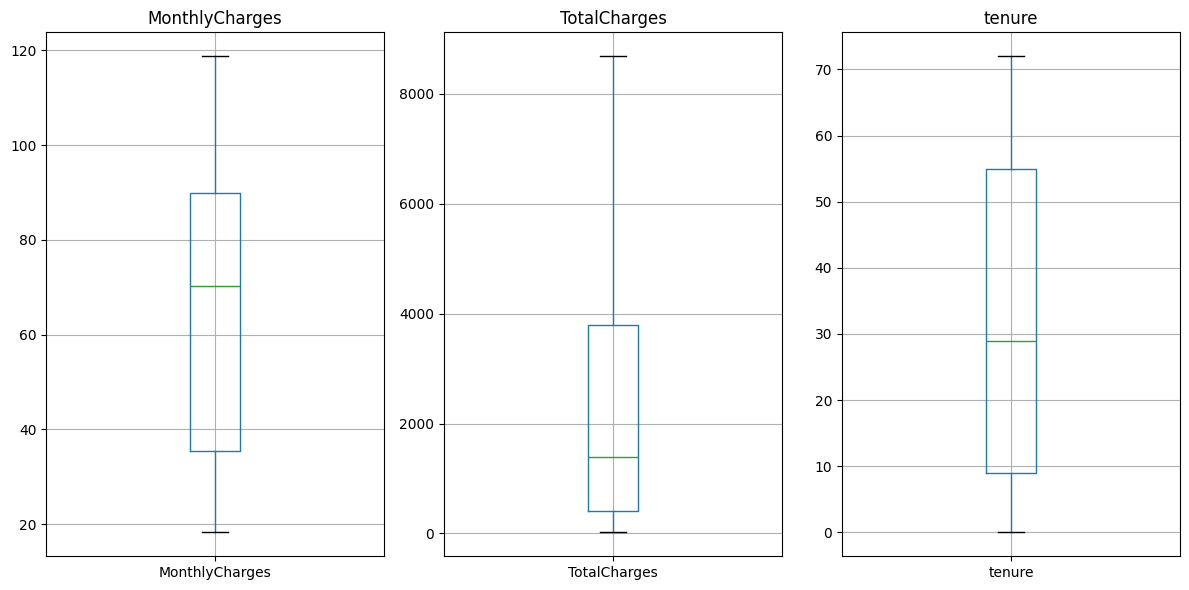

In [23]:
# Visualizing outliers in continuous features using boxplots
numerical_columns = data[['MonthlyCharges', 'TotalCharges', 'tenure']].columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    data.boxplot(column=col)
    plt.title(col)
    plt.tight_layout()
plt.show()

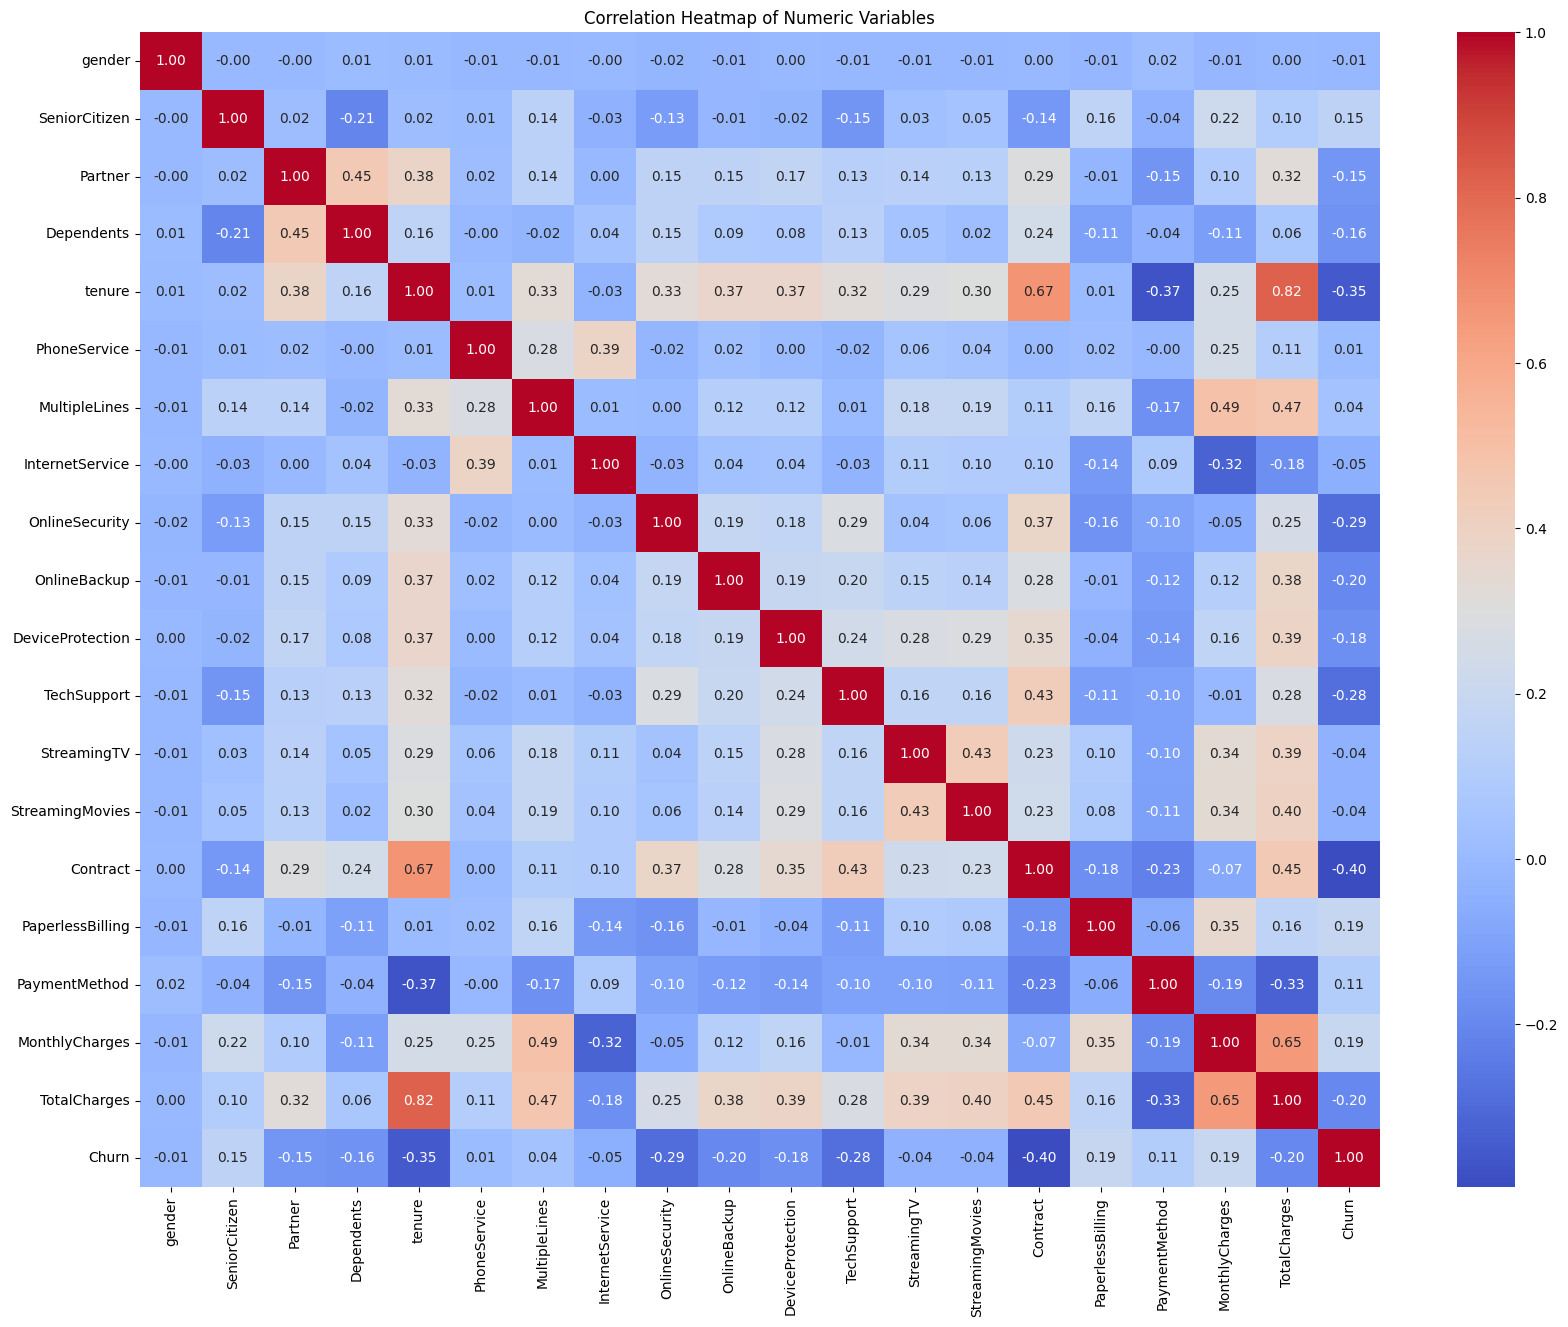

In [24]:
# Correlation heatmap of numeric variables to analyze relationships
numeric_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

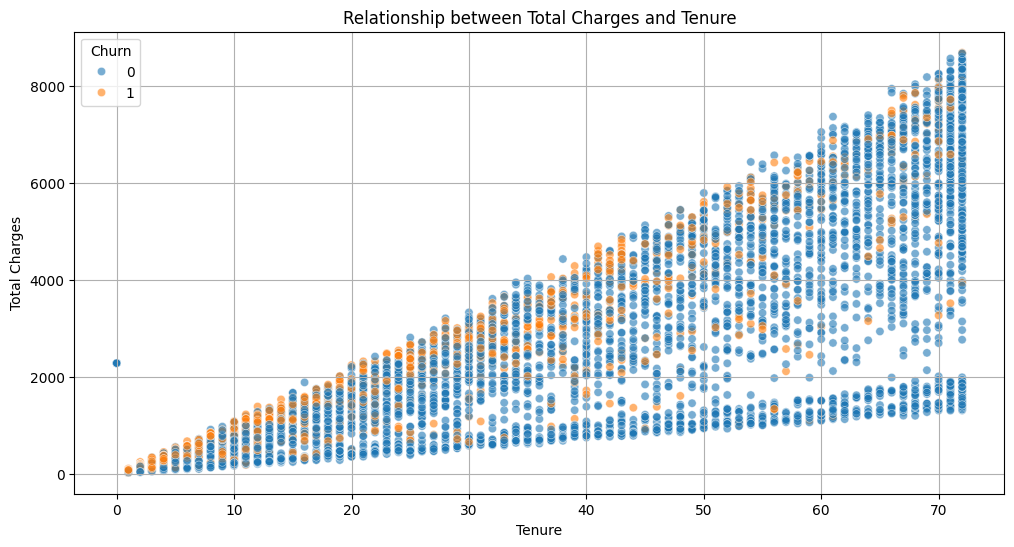

In [25]:
# Scatter plot to visualize the relationship between 'tenure' and 'TotalCharges' by churn status
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='tenure', y='TotalCharges', hue='Churn', alpha=0.6)
plt.title('Relationship between Total Charges and Tenure')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.legend(title='Churn', loc='upper left')
plt.grid(True)
plt.show()

In [26]:
# Separating features (X) from the target (y), dropping irrelevant columns
X = data.drop(['gender', 'Churn', 'PhoneService', 'TotalCharges'], axis=1)
y = data['Churn']

In [29]:
df.shape

(7043, 21)

In [28]:
# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Check the shapes after SMOTE

print(f"Shape of X after SMOTE: {X_smote.shape}")
print(f"Shape of y after SMOTE: {y_smote.shape}")

Shape of X after SMOTE: (10348, 16)
Shape of y after SMOTE: (10348,)


In [25]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=20)

# Model Training and Evaluation

In [26]:
# Defining a function to train and evaluate multiple machine learning models
def train_model(X_train, X_test, y_train, y_test):
    classifier = {
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
        "SVM": SVC(),
        "KNN": KNeighborsClassifier(),
        "XGBoost": xgb.XGBClassifier(),
        "Decision Tree Classifier": DecisionTreeClassifier(),
        "RandomForestClassifier": RandomForestClassifier(random_state=42)
    }

    for name, model in classifier.items():
        print(f"\n================ {name} ================\n")
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        print(f"Confusion Matrix:\n{cm}\n")

        # Accuracy
        print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}\n")

        # Classification report
        clf_report = classification_report(y_test, y_pred)
        print(f"\nClassification Report:\n{clf_report}\n")

In [27]:
# Training models and displaying accuracy, confusion matrix, and classification report for each model
train_model(X_train, X_test, y_train, y_test)


================ Logistic Regression ================

Confusion Matrix:
[[787 244]
 [173 866]]


Accuracy: 0.7985507246376812


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1031
           1       0.78      0.83      0.81      1039

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



================ SVM ================

Confusion Matrix:
[[757 274]
 [203 836]]


Accuracy: 0.7695652173913043


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1031
           1       0.75      0.80      0.78      1039

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



================ KNN ================

Confusion Matr

# XGBoost Tuning

In [28]:
# Further training and fine-tuning the XGBoost model with early stopping
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    'objective': 'binary:logistic',
    'max_depth': 10,
    'eta': 0.09,
    'colsample_bytree': 0.85,
}
bst = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtrain, 'train'), (dtest, 'test')], early_stopping_rounds=10,
                verbose_eval=10)

[0]	train-logloss:0.64800	test-logloss:0.65226
[10]	train-logloss:0.41883	test-logloss:0.46113
[20]	train-logloss:0.32612	test-logloss:0.40107
[30]	train-logloss:0.27656	test-logloss:0.37871
[40]	train-logloss:0.24436	test-logloss:0.36957
[50]	train-logloss:0.22495	test-logloss:0.36470
[60]	train-logloss:0.21195	test-logloss:0.36278
[70]	train-logloss:0.20131	test-logloss:0.36119
[80]	train-logloss:0.19200	test-logloss:0.36037
[90]	train-logloss:0.18130	test-logloss:0.35960
[99]	train-logloss:0.17468	test-logloss:0.36026


In [29]:
# Making predictions using the fine-tuned XGBoost model and calculating accuracy on training and test sets
preds = bst.predict(dtest)
y_pred = [1 if x > 0.5 else 0 for x in preds]
accuracy  = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 84.40%


In [30]:
# Display the classification report for XGBoost model on the test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1031
           1       0.83      0.86      0.85      1039

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



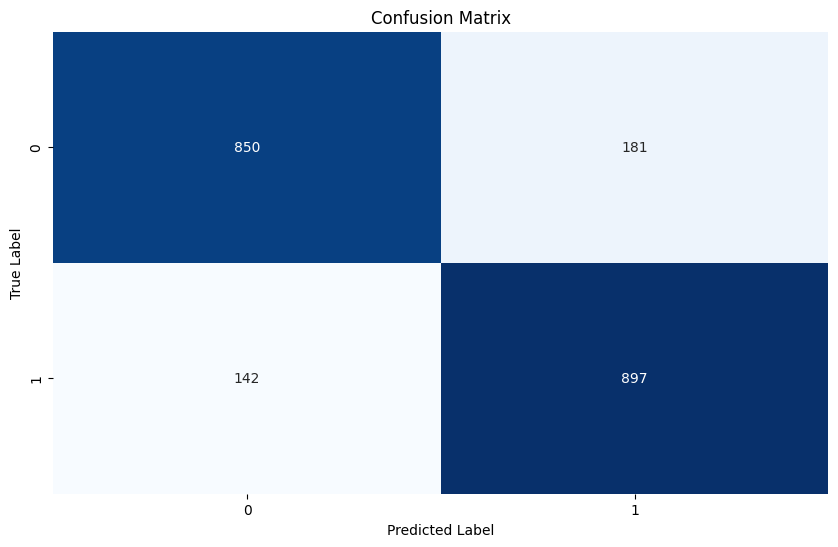

In [31]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()